In [1]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import gmaps
import os
import time
import datetime as dt
from scipy.stats import linregress
import polyline
%matplotlib inline
import gmaps.datasets
import seaborn as sns
import folium
from folium import Choropleth
from folium.plugins import HeatMap



# Import API key
from api_keys import g_key

In [2]:
#import files 
earthquake_data = "Resources/earthquakes.csv"

fort_tejon_data = "Resources/fort_tejon_1857.csv"

san_fran_data = "Resources/san_francisco_1906.csv"

# Read the data into the file
final_earthquake_df = pd.read_csv(earthquake_data)
san_fran_df = pd.read_csv(san_fran_data)
fort_tejon_df = pd.read_csv(fort_tejon_data)

# Display the data table for preview
earthquake_data

'Resources/earthquakes.csv'

In [3]:
final_earthquake_df = final_earthquake_df.sort_values(by=['Year','Month','Day'], ascending=[True, True,True])
final_earthquake_df

,City,Magnitude,MMI,CDI,Latitude,Longitude,Time,Year,Month,Day
0,"Near San Juan Bautista, California",5.50,NaN,NaN,36.870000,-121.570000,00:00:00,1800,10,11
1,"Gulf of Santa Catalina, California",6.30,NaN,NaN,32.900000,-117.800000,21:30:00,1800,11,22
2,"San Diego area, California",5.50,NaN,NaN,32.800000,-117.100000,00:00:00,1803,5,25
3,"Near Santa Barbara, California",5.50,NaN,NaN,34.400000,-119.700000,08:00:00,1806,3,25
4,"Near San Francisco, California",5.50,NaN,NaN,37.800000,-122.600000,00:00:00,1808,6,21
...,...,...,...,...,...,...,...,...,...,...
5202,"18km NW of San Simeon, CA",4.65,4.656,3.8,35.775833,-121.304333,23:42:35,2021,10,25
5203,"35 km SE of Mina, Nevada",4.20,4.608,3.8,38.167700,-117.823800,07:21:14,2022,1,5
5204,"8km ESE of Deep Springs, CA",4.75,5.384,4.6,37.333833,-117.902333,00:28:07,2022,1,6
5205,"25 km SW of Mina, Nevada",4.30,4.397,3.4,38.257100,-118.352800,22:40:11,2022,1,22


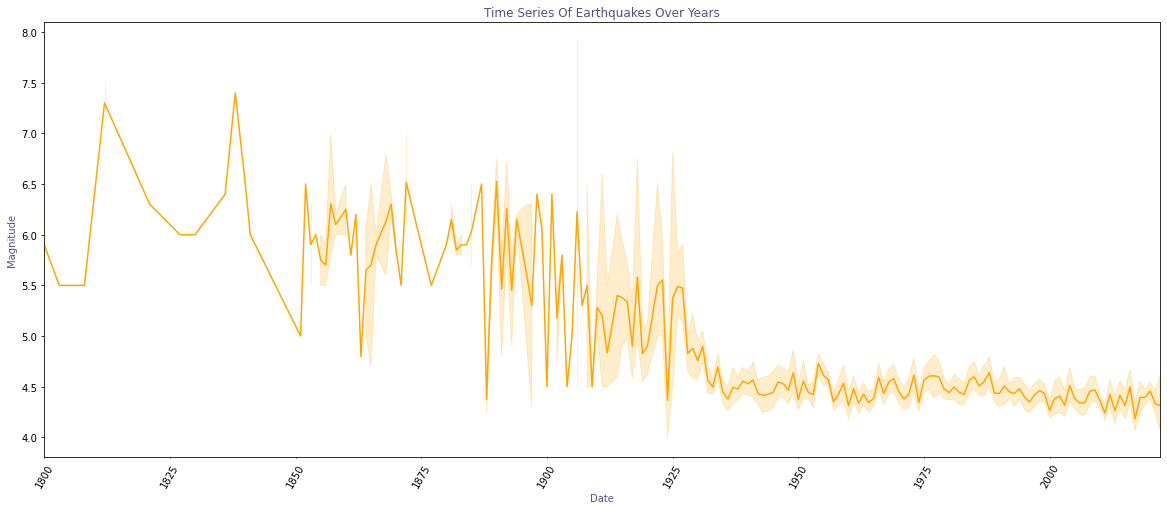

In [4]:
#plotting a lineplot with magnitudes with respect to dates

# Apply the default theme

plot = plt.figure(figsize=(20,8))
time_series=sns.lineplot(x= final_earthquake_df['Year'],y="Magnitude",data=final_earthquake_df, color="#ffa600")
time_series.set_title("Time Series Of Earthquakes Over Years", color="#58508d")
time_series.set_ylabel("Magnitude", color="#58508d") 
time_series.set_xlabel("Date", color="#58508d")


plt.xticks(rotation=60) 
plt.margins(x=0)
            
time_series.tick_params(axis = 'x', which = 'major', length = 1)
time_series.tick_params(axis = 'x', which = 'minor', length = 1)


In [5]:
from branca.element import Figure
fig=Figure(width=550,height=350)

map =folium.Map(location=[35.1361, -119.6756])
map

fig2= Figure(width=550,height=350)
m2=folium.Map(location=[35.1361, -119.6756])
fig2.add_child(m2)
folium.TileLayer('Stamen Terrain').add_to(m2)
folium.TileLayer('Stamen Toner').add_to(m2)
folium.TileLayer('Stamen Water Color').add_to(m2)
folium.TileLayer('cartodbpositron').add_to(m2)
folium.TileLayer('cartodbdark_matter').add_to(m2)
folium.LayerControl().add_to(m2)
m2

coords_1= [(39.914, -124.163),
(39.439, -123.890),
(38.997, -123.597),
(38.541,-123.305),
(37.874, -122.696),
(37.527, -122.380),
(37.205, -122.005),
(36.698, -121.305),
(36.338, -120.897),
(35.910, -120.438),
(35.450, -119.936),
(34.981, -119.329),
(34.837, -118.912),
(34.658, -118.400),
(34.564, -118.072),
(34.441, -117.746),
(34.350, -117.507),
(34.181, -117.159),
(34.042, -116.660),
(33.771, -116.209),
(33.421, -115.773),
(33.421, -115.773),
(33.237, -115.596)]



fig5=Figure(height=550,width=750)
m5=folium.Map(location=[35.1361, -119.6756],tiles='cartodbpositron',zoom_start=5)
fig5.add_child(m5)


# Creating feature groups
f1=folium.FeatureGroup("Fault Line")


# Adding lines to the different feature groups
line_1=folium.vector_layers.PolyLine(coords_1,popup='<b>San Andreas Fault Line1</b>',color='red',weight=2).add_to(f1)

f1.add_to(m5)

folium.LayerControl().add_to(m5)
m5


In [6]:
final_earthquake_df

,City,Magnitude,MMI,CDI,Latitude,Longitude,Time,Year,Month,Day
0,"Near San Juan Bautista, California",5.50,NaN,NaN,36.870000,-121.570000,00:00:00,1800,10,11
1,"Gulf of Santa Catalina, California",6.30,NaN,NaN,32.900000,-117.800000,21:30:00,1800,11,22
2,"San Diego area, California",5.50,NaN,NaN,32.800000,-117.100000,00:00:00,1803,5,25
3,"Near Santa Barbara, California",5.50,NaN,NaN,34.400000,-119.700000,08:00:00,1806,3,25
4,"Near San Francisco, California",5.50,NaN,NaN,37.800000,-122.600000,00:00:00,1808,6,21
...,...,...,...,...,...,...,...,...,...,...
5202,"18km NW of San Simeon, CA",4.65,4.656,3.8,35.775833,-121.304333,23:42:35,2021,10,25
5203,"35 km SE of Mina, Nevada",4.20,4.608,3.8,38.167700,-117.823800,07:21:14,2022,1,5
5204,"8km ESE of Deep Springs, CA",4.75,5.384,4.6,37.333833,-117.902333,00:28:07,2022,1,6
5205,"25 km SW of Mina, Nevada",4.30,4.397,3.4,38.257100,-118.352800,22:40:11,2022,1,22


In [7]:
# Filter data between two dates
filtered_1857 = final_earthquake_df.loc[(final_earthquake_df['Year'] >= 1827)
                     & (final_earthquake_df['Year'] <=1857)]
# Display

filtered_1857 = filtered_1857.sort_values(by=['Year','Month','Day'], ascending=[True, True,True])
filtered_1857.head(5)

,City,Magnitude,MMI,CDI,Latitude,Longitude,Time,Year,Month,Day
8,"Channel Islands region, California",6.0,NaN,NaN,34.00,-119.00,04:00:00,1827,9,24
9,"Near San Juan Bautista, California",6.0,NaN,NaN,35.35,-120.65,00:00:00,1830,1,1
10,"Near San Juan Bautista, California",6.4,NaN,NaN,36.90,-121.50,15:30:00,1836,6,10
11,"The 1838 San Andreas Fault Earthquake, California",7.4,NaN,NaN,37.30,-122.15,20:00:00,1838,6,25
12,"Near San Juan Bautista, California",6.5,NaN,NaN,36.85,-121.50,00:00:00,1840,1,18


In [8]:
# Use google maps api
gmaps.configure(api_key=g_key) # Fill in with your API key
#Get the locations from the data set
locations = filtered_1857[["Latitude", "Longitude"]]
#Get the magnitude from the data
weights = filtered_1857['Magnitude']
#Set up your map
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locations, weights=weights))
fig

Figure(layout=FigureLayout(height='420px'))

In [9]:
# Filter data between two dates
filtered_1906 = final_earthquake_df.loc[(final_earthquake_df['Year'] >= 1876)
                     & (final_earthquake_df['Year'] <= 1906)]

filtered_1906 = filtered_1906.sort_values(by=['Year','Month','Day'], ascending=[True, True,True])
filtered_1906.head(5)

,City,Magnitude,MMI,CDI,Latitude,Longitude,Time,Year,Month,Day
60,"Lake Tahoe area, California-Nevada border",5.5,NaN,NaN,39.00,-120.00,07:10:00,1877,7,10
61,"Near San Bernardino, California",5.9,NaN,NaN,34.00,-117.00,23:35:00,1880,12,19
62,"Northwest of Parkfield, California",6.0,NaN,NaN,36.05,-120.55,00:11:00,1881,2,2
63,"Southwest of Modesto, California",6.3,NaN,NaN,37.30,-121.30,10:00:00,1881,4,10
64,"Southeast of Hollister, California",5.9,NaN,NaN,36.50,-121.10,21:45:00,1882,3,6


In [10]:
# Use google maps api
gmaps.configure(api_key=g_key) # Fill in with your API key

#Get the locations from the data set
locations = filtered_1906[["Latitude", "Longitude"]]
#Get the magnitude from the data
weights = filtered_1906['Magnitude']
#Set up your map
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locations, weights=weights))
fig

Figure(layout=FigureLayout(height='420px'))

In [11]:
# Filter data between two dates
filtered_2022 = final_earthquake_df.loc[(final_earthquake_df['Year'] >= 1992)
                     & (final_earthquake_df['Year'] <= 2022)]

filtered_2022 = filtered_2022.sort_values(by=['Year','Month','Day'], ascending=[True, True,True])
filtered_2022.head(50)

,City,Magnitude,MMI,CDI,Latitude,Longitude,Time,Year,Month,Day
3659,"13 km SSW of Mountain House, California",4.00,NaN,NaN,37.678500,-121.609333,14:36:19,1992,2,15
3660,"6km ESE of Coso Junction, California",4.06,NaN,NaN,36.026000,-117.889000,11:19:24,1992,2,19
3661,"18km WSW of San Clemente Is. (NW tip), California",4.30,NaN,NaN,32.975000,-118.791000,19:06:26,1992,3,4
3662,"53 km NE of Beatty, Nevada",5.50,NaN,NaN,37.272000,-116.360000,16:30:00,1992,3,26
3663,"16km S of Joshua Tree, California",4.24,NaN,NaN,33.991000,-116.284000,18:56:03,1992,4,23
3664,"15km NNE of Thousand Palms, California",4.14,NaN,NaN,33.942000,-116.312000,13:35:57,1992,4,23
3665,"15km NNE of Thousand Palms, California",4.01,NaN,NaN,33.943000,-116.325000,05:23:16,1992,4,23
3666,"16km E of Desert Hot Springs, California",4.30,NaN,NaN,33.958000,-116.330000,05:10:28,1992,4,23
3667,"14km S of Joshua Tree, California",4.00,NaN,NaN,34.010000,-116.324000,05:10:10,1992,4,23
3668,"17km NNE of Thousand Palms, California",6.10,7.394,NaN,33.960000,-116.317000,04:50:23,1992,4,23


In [12]:
# Use google maps api
gmaps.configure(api_key=g_key) 
#Get the locations from the data set
locations = filtered_2022[["Latitude", "Longitude"]]
#Get the magnitude from the data
weights = filtered_2022['Magnitude']
#Set up your map
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locations, weights=weights))
fig

Figure(layout=FigureLayout(height='420px'))